In [37]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# fetch dataset 
online_retail = fetch_ucirepo(id=352) 

In [23]:
print(online_retail.metadata)
print(online_retail.variables)

{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Oct 21 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'ID': 361, 'type': 'NATIVE', 'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmenta

In [29]:
online_retail.data.features 

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [27]:
online_retail.data['ids']

,InvoiceNo,StockCode
0,536365,85123A
1,536365,71053
2,536365,84406B
3,536365,84029G
4,536365,84029E
...,...,...
541904,581587,22613
541905,581587,22899
541906,581587,23254
541907,581587,23255


In [33]:
# full pandas dataframw with 8 columns considering 'InvoiceNo' and 'StockCode' as features 
X = pd.concat([online_retail.data['ids'], online_retail.data.features], axis=1)
X

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [36]:
# customerID is often NaN and few times also description
X.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [38]:
retail_df = X.copy()

# Convert InvoiceDate to datetime
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Add a TotalPrice column (Quantity * UnitPrice)
retail_df['TotalPrice'] = retail_df['Quantity'] * retail_df['UnitPrice']

In [39]:
# Check for negative quantities (likely returns/cancellations)
print("Number of transactions with negative quantity:", (retail_df['Quantity'] < 0).sum())

Number of transactions with negative quantity: 10624


In [40]:
# Explore cancellation invoices (those starting with 'C')
retail_df['IsCancel'] = retail_df['InvoiceNo'].astype(str).str.startswith('C')
print("Number of cancellation invoices:", retail_df['IsCancel'].sum())

Number of cancellation invoices: 9288


In [41]:
# Basic statistics of the dataset
print("\nBasic Statistics for Numeric Columns:")
print(retail_df[['Quantity', 'UnitPrice', 'TotalPrice']].describe())


Basic Statistics for Numeric Columns:
            Quantity      UnitPrice     TotalPrice
count  541909.000000  541909.000000  541909.000000
mean        9.552250       4.611114      17.987795
std       218.081158      96.759853     378.810824
min    -80995.000000  -11062.060000 -168469.600000
25%         1.000000       1.250000       3.400000
50%         3.000000       2.080000       9.750000
75%        10.000000       4.130000      17.400000
max     80995.000000   38970.000000  168469.600000


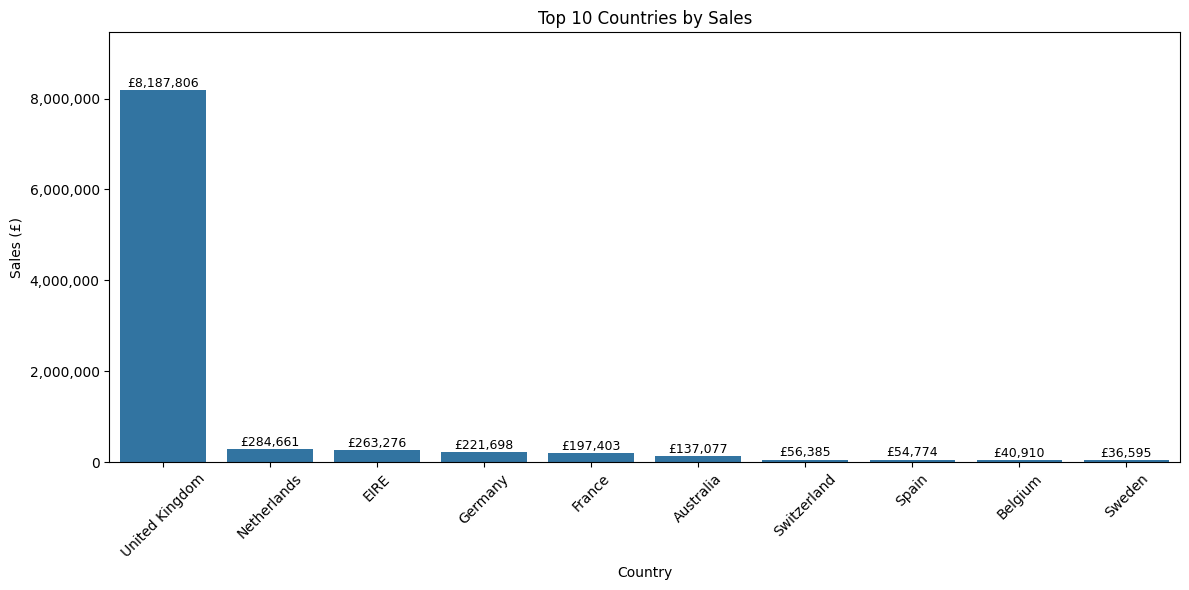

In [48]:
country_sales = retail_df.groupby('Country').agg({
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum',
    'CustomerID': pd.Series.nunique
}).reset_index()

country_sales.columns = ['Country', 'Transactions', 'Sales', 'Customers']
country_sales = country_sales.sort_values('Sales', ascending=False).head(10)

# Create the plot with absolute numbers
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Country', y='Sales', data=country_sales)
plt.title('Top 10 Countries by Sales')
plt.xticks(rotation=45)
plt.ylabel('Sales (£)')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add value labels on top of each bar
for i, bar in enumerate(ax.patches):
    # Place the text above the bar
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5000, 
            f'£{int(bar.get_height()):,}', 
            ha='center', va='bottom', fontsize=9)

# Set the y-limit slightly higher to accommodate the labels
current_ylim = plt.ylim()
plt.ylim(0, current_ylim[1] * 1.1)  # Add 10% space at the top

plt.tight_layout()
plt.show()

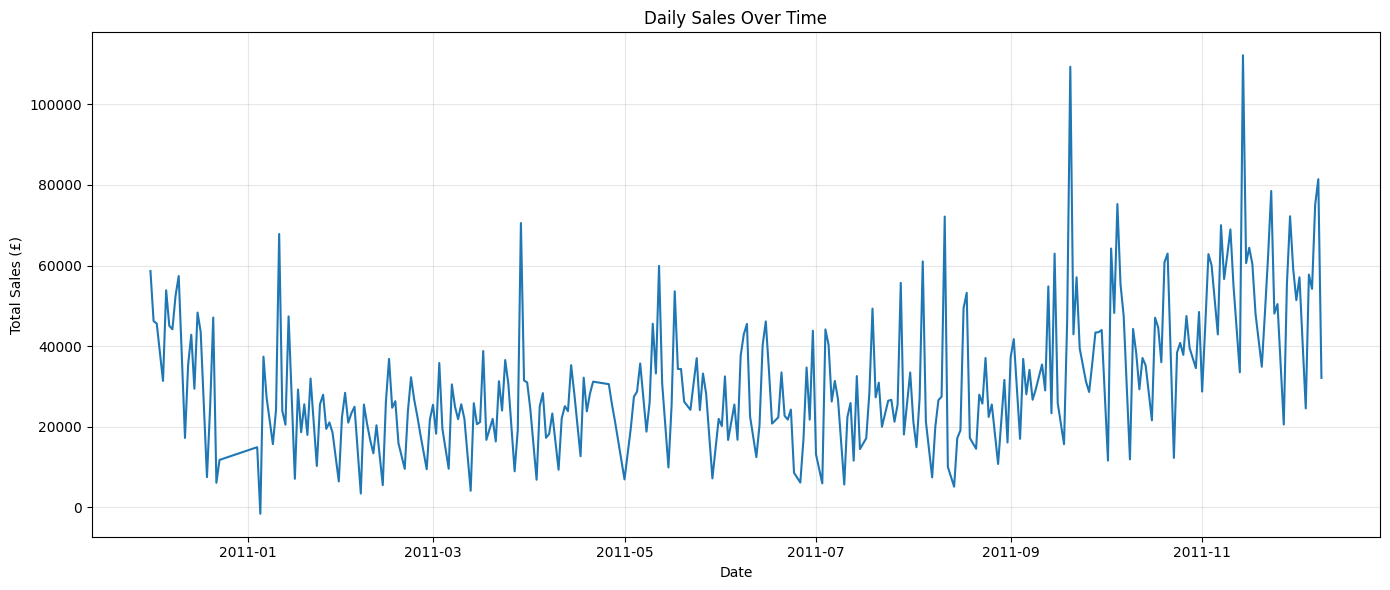

In [44]:
daily_sales = retail_df.groupby(retail_df['InvoiceDate'].dt.date).agg({
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

daily_sales.columns = ['Date', 'NumTransactions', 'TotalSales']

plt.figure(figsize=(14, 6))
plt.plot(daily_sales['Date'], daily_sales['TotalSales'])
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (£)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

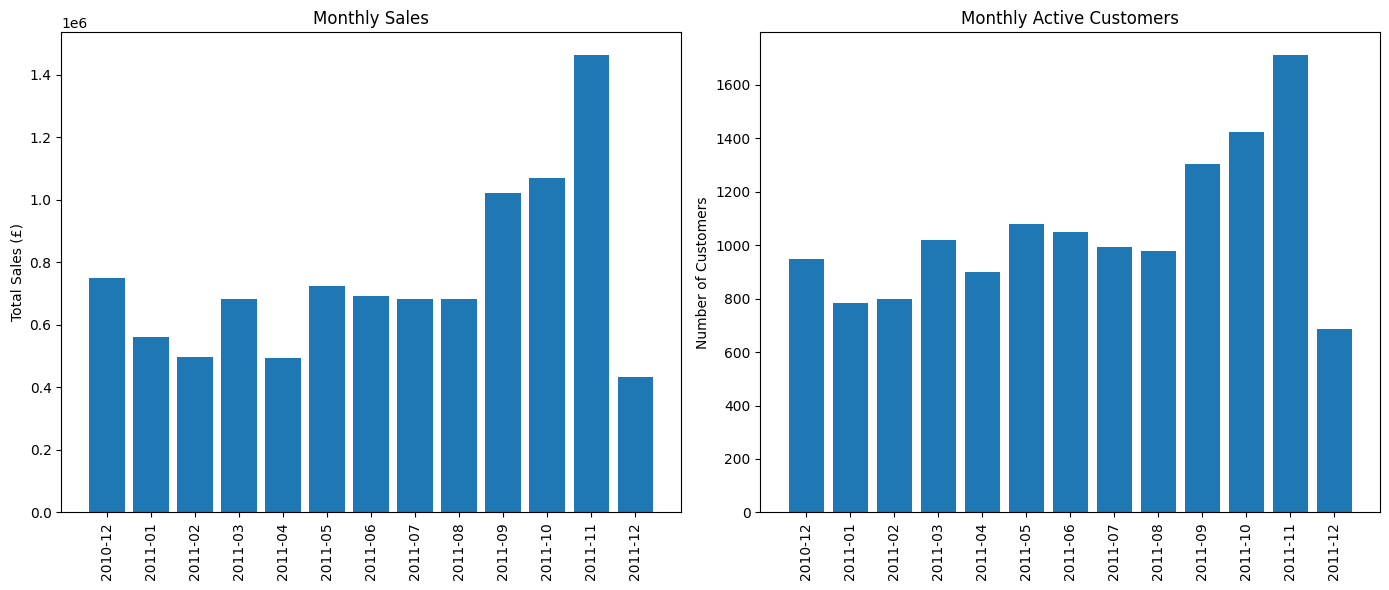

In [46]:
retail_df['YearMonth'] = retail_df['InvoiceDate'].dt.to_period('M')
monthly_sales = retail_df.groupby('YearMonth').agg({
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum',
    'CustomerID': lambda x: x.dropna().nunique()
}).reset_index()

monthly_sales.columns = ['YearMonth', 'NumTransactions', 'TotalSales', 'UniqueCustomers']
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.bar(monthly_sales['YearMonth'], monthly_sales['TotalSales'])
plt.title('Monthly Sales')
plt.xticks(rotation=90)
plt.ylabel('Total Sales (£)')

plt.subplot(1, 2, 2)
plt.bar(monthly_sales['YearMonth'], monthly_sales['UniqueCustomers'])
plt.title('Monthly Active Customers')
plt.xticks(rotation=90)
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

In [49]:
# Products by quantity sold
product_quantity = retail_df.groupby(['StockCode', 'Description']).agg({
    'Quantity': 'sum',
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

product_quantity.columns = ['StockCode', 'Description', 'TotalQuantity', 'TransactionCount', 'TotalRevenue']
product_quantity = product_quantity.sort_values('TotalQuantity', ascending=False)

# Filter out any missing descriptions and special items like postage
valid_products = product_quantity[
    (product_quantity['Description'].notna()) & 
    (~product_quantity['StockCode'].str.contains('POST', na=False, case=False)) &
    (product_quantity['StockCode'] != 'DOT') &
    (product_quantity['TotalQuantity'] > 0)
]

# Display top products by quantity
top_by_quantity = valid_products.head(15)
print("Top 15 Products by Quantity Sold:")
print(top_by_quantity[['StockCode', 'Description', 'TotalQuantity', 'TransactionCount', 'TotalRevenue']])

Top 15 Products by Quantity Sold:
     StockCode                         Description  TotalQuantity  \
3617     84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS          53847   
4197    85099B             JUMBO BAG RED RETROSPOT          47363   
3956     84879       ASSORTED COLOUR BIRD ORNAMENT          36381   
1333     22197                      POPCORN HOLDER          36334   
531      21212     PACK OF 72 RETROSPOT CAKE CASES          36039   
4223    85123A  WHITE HANGING HEART T-LIGHT HOLDER          35025   
2344     23084                  RABBIT NIGHT LIGHT          30680   
1630     22492             MINI PAINT SET VINTAGE           26437   
1775     22616          PACK OF 12 LONDON TISSUES           26315   
1122     21977  PACK OF 60 PINK PAISLEY CAKE CASES          24753   
1312     22178     VICTORIAN GLASS HANGING T-LIGHT          23854   
14       15036           ASSORTED COLOURS SILK FAN          23082   
91       17003                 BROCADE RING PURSE           23053   


In [51]:
# Filter out records with missing CustomerID and ensure Quantity and UnitPrice are valid
valid_transactions = retail_df[
    (retail_df['CustomerID'].notna()) & 
    (retail_df['Quantity'] > 0) & 
    (retail_df['UnitPrice'] > 0)
]

# Calculate total spend by customer
customer_spend = valid_transactions.groupby('CustomerID').agg({
    'TotalPrice': 'sum',
    'InvoiceNo': 'nunique',
    'StockCode': 'nunique'
}).reset_index()

customer_spend.columns = ['CustomerID', 'TotalSpend', 'TransactionCount', 'UniqueProducts']
customer_spend = customer_spend.sort_values('TotalSpend', ascending=False).head(20)

# Format CustomerID as integer for cleaner display
customer_spend['CustomerID'] = customer_spend['CustomerID'].astype(int)

# Print a summary table with additional details
print("Top 20 Customers by Total Spend:")
print(customer_spend[['CustomerID', 'TotalSpend', 'TransactionCount', 'UniqueProducts']])

Top 20 Customers by Total Spend:
      CustomerID  TotalSpend  TransactionCount  UniqueProducts
1689       14646   280206.02                73             700
4201       18102   259657.30                60             150
3728       17450   194550.79                46             124
3008       16446   168472.50                 2               3
1879       14911   143825.06               201            1787
55         12415   124914.53                21             444
1333       14156   117379.63                55             714
3771       17511    91062.38                31             453
2702       16029    81024.84                63              44
0          12346    77183.60                 1               1
3176       16684    66653.56                28             119
1289       14096    65164.79                17            1119
996        13694    65039.62                50             366
2176       15311    60767.90                91             567
562        13089    58